In [4]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-225-2 model fitting.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Aldehyde,Unnamed: 4,Imine ester,Intermediate 1,Intermediate 2,Unnamed: 8,Ester fuel,...,Unnamed: 11,Unnamed: 12,Phenol waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel dimer,Alanine waste
0,-360,0.000000,4651.12,6.000000,0.000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.000,0.000,0.0,0.000000,0.000000
1,0,6.000000,3135.13,4.759785,816.893,1.240215,0,0,46711.7,39.550978,...,0.629446,7440.02,6.411620,69445.5,2663.210,797.175,1119.870,11764.4,0.446023,6.582238
2,297,10.950000,1602.32,4.892807,362.589,1.107193,0,0,21281.8,35.993119,...,0.870345,5747.38,9.888811,33256.4,1271.370,718.303,866.581,10015.9,0.747445,10.422247
3,548,15.133333,1686.97,5.062867,312.257,0.937133,0,0,19540.0,33.283886,...,0.947217,7329.63,12.687842,30547.9,1017.020,822.778,998.538,12669.8,0.857506,13.204575
4,798,19.300000,1710.71,5.215222,257.425,0.784778,0,0,17973.5,30.835559,...,1.094390,8717.94,15.173934,28304.5,942.003,1023.120,1165.380,15172.0,1.053699,15.625463


In [5]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Fuel dimer":"Fuel_dimer", "Phenol waste":"Phenol_waste", "Alanine waste":"Alanine_waste", \
                             "Intermediate 1":"I1", "Intermediate 2":"I2", "Imine ester":"Imine_ester"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Aldehyde,Unnamed: 4,Imine_ester,I1,I2,Unnamed: 8,Fuel,...,Unnamed: 11,Unnamed: 12,Phenol_waste,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Fuel_dimer,Alanine_waste
0,-360,0.000000,4651.12,6.000000,0.000,0.000000,0,0,1.0,48.000000,...,0.000000,0.00,0.000000,1.0,0.000,0.000,0.000,0.0,0.000000,0.000000
1,0,6.000000,3135.13,4.759785,816.893,1.240215,0,0,46711.7,39.550978,...,0.629446,7440.02,6.411620,69445.5,2663.210,797.175,1119.870,11764.4,0.446023,6.582238
2,297,10.950000,1602.32,4.892807,362.589,1.107193,0,0,21281.8,35.993119,...,0.870345,5747.38,9.888811,33256.4,1271.370,718.303,866.581,10015.9,0.747445,10.422247
3,548,15.133333,1686.97,5.062867,312.257,0.937133,0,0,19540.0,33.283886,...,0.947217,7329.63,12.687842,30547.9,1017.020,822.778,998.538,12669.8,0.857506,13.204575
4,798,19.300000,1710.71,5.215222,257.425,0.784778,0,0,17973.5,30.835559,...,1.094390,8717.94,15.173934,28304.5,942.003,1023.120,1165.380,15172.0,1.053699,15.625463


Derivative(alanine_waste, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k1*fuel + k10*imine_ester + k7*i2
Derivative(aldehyde, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k10*imine_ester - k4*aldehyde*fuel + k5*i1 + k7*i2
Derivative(fuel, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = -k1*fuel - 2*k2*fuel**2 - k4*aldehyde*fuel + k5*i1
Derivative(fuel_dimer, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k2*fuel**2 - k3*fuel_dimer
Derivative(i1, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k4*aldehyde*fuel - k5*i1 - k6*i1 - k8*i1 + k9*imine_ester
Derivative(i2, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k6*i1 - k7*i2
Derivative(imine_ester, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = -k10*imine_ester + k8*i1 - k9*imine_ester
Derivative(phenol_waste, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k1*fuel + k10*imine_ester + k2*fuel**2 + k3*fuel_dimer + k6*i1
Derivative(waste_dimer, t; k1, k10, k2, k3, k4, k5, k6, k7, k8, k9) = k3*fuel_dimer

Parameter Value        Standard Deviation

<IPython.core.display.Javascript object>


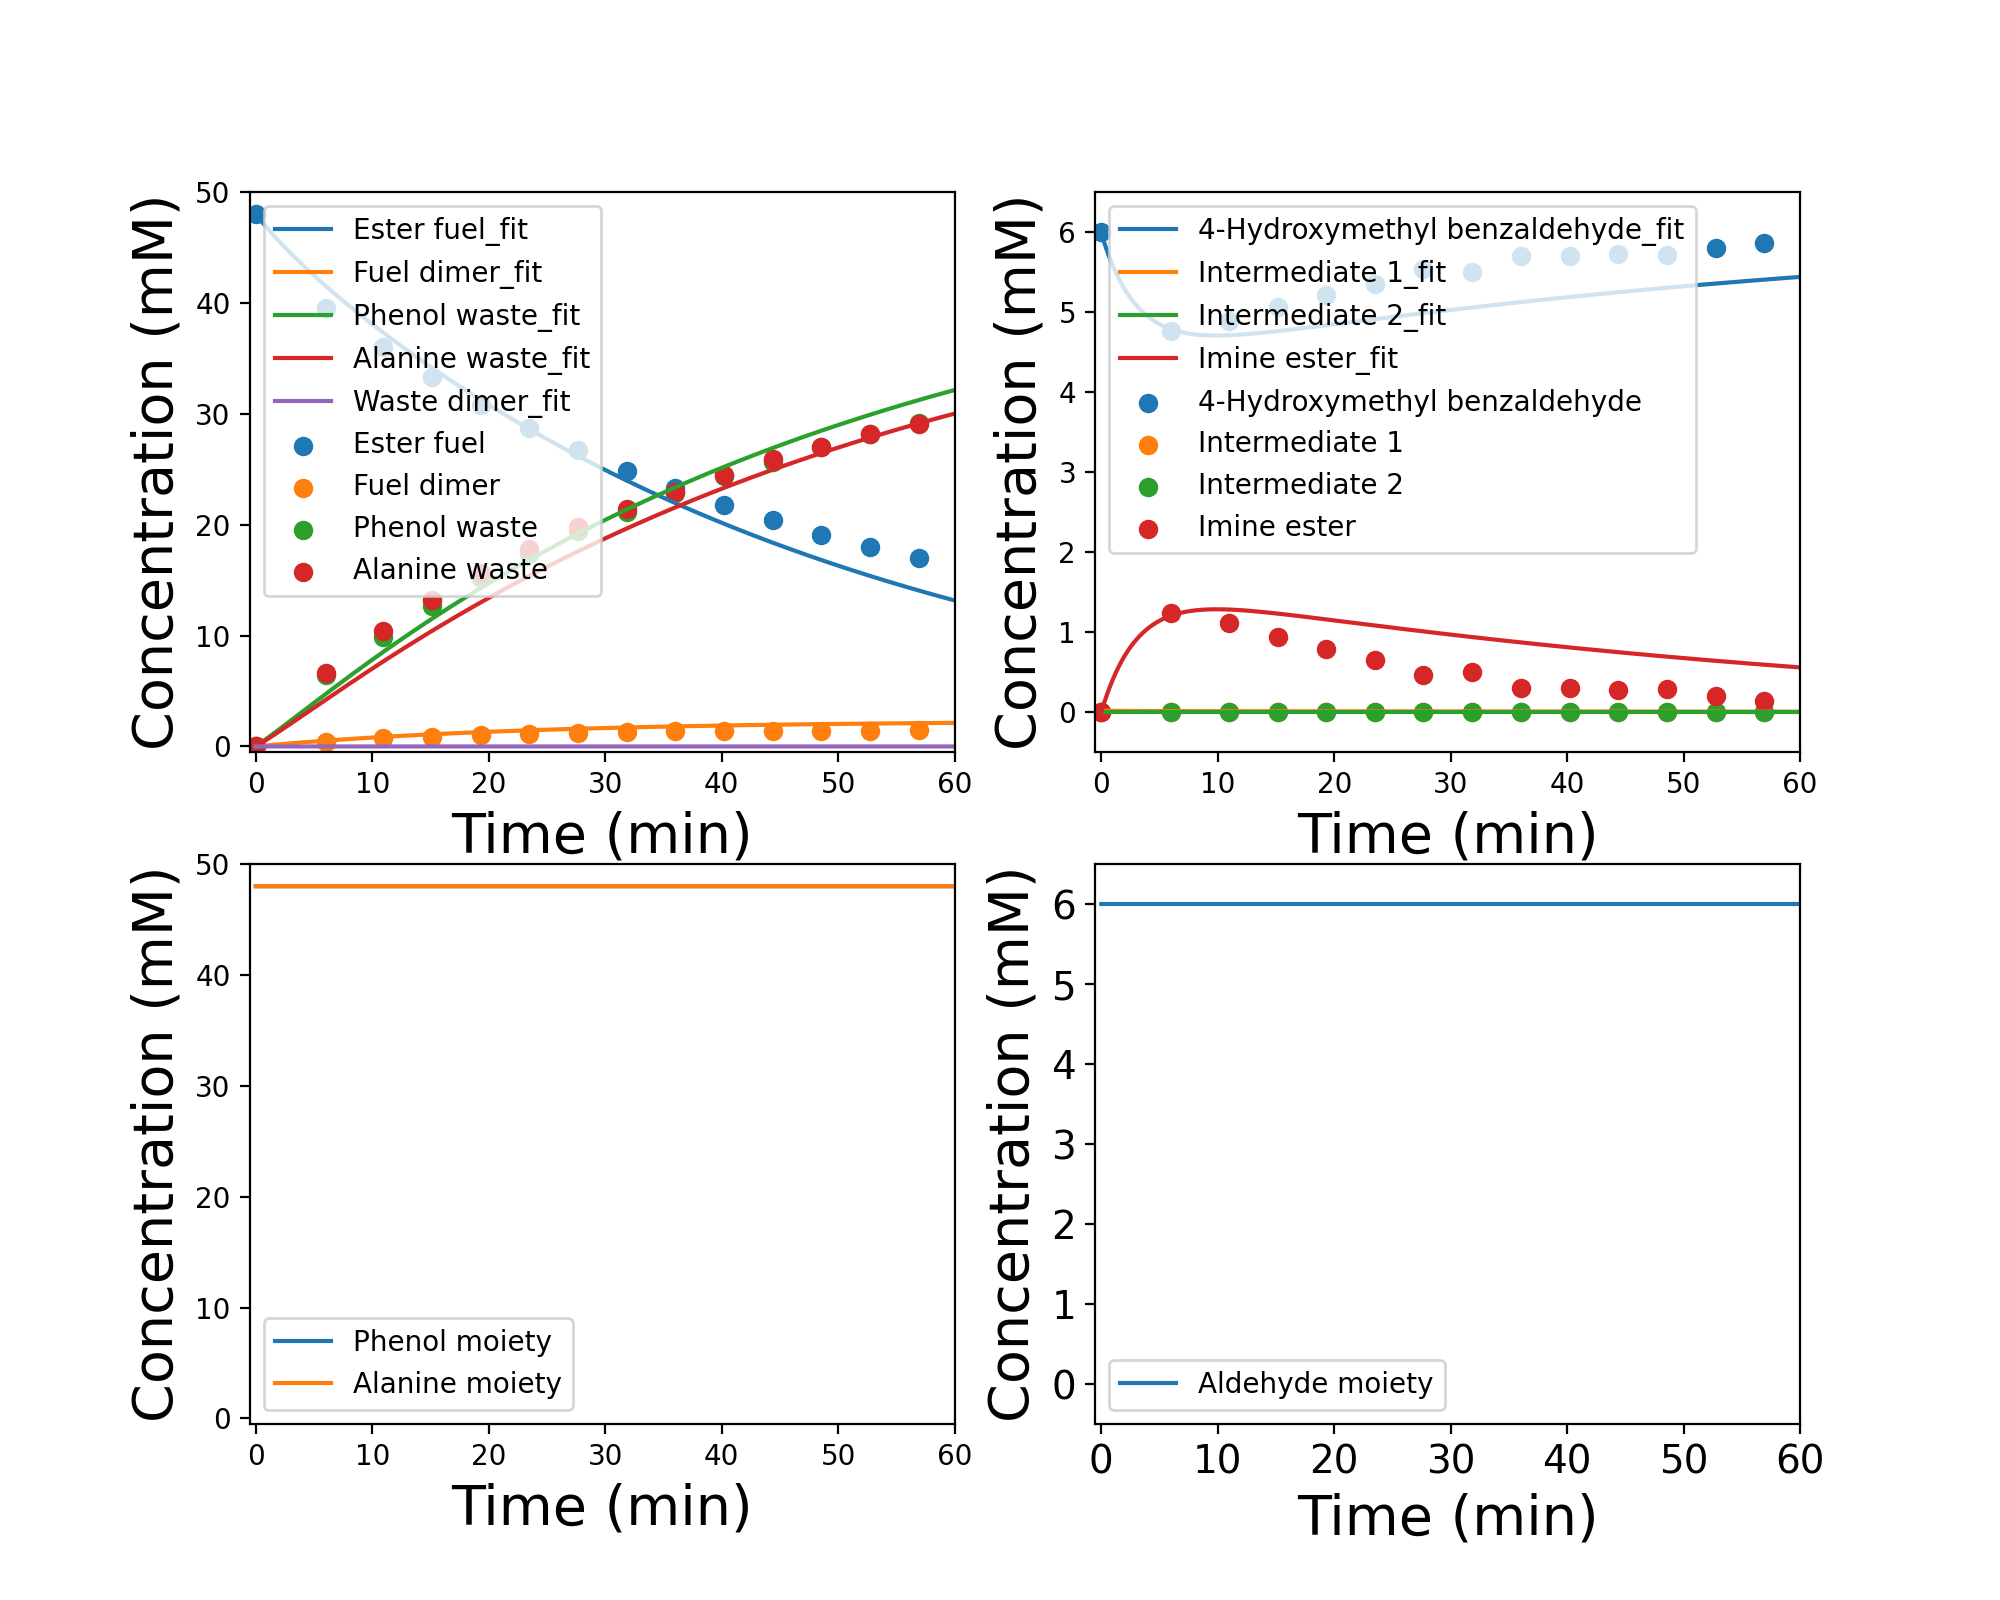

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import Parameter, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-225-2 (pH 7.00) with a detailed model based on concentration, not abundance. The concentration was calculated WITHOUT a external standard.

As the initial values of the rate constants, the values obtained from the manual fitting were used. The fitting was performed by combining automatic and manual fitting.
"""

t, fuel, fuel_dimer, phenol_waste, alanine_waste, waste_dimer, aldehyde, i1, i2, imine_ester = variables('t, fuel, fuel_dimer, phenol_waste, alanine_waste, waste_dimer, aldehyde, i1, i2, imine_ester')
k1 = Parameter('k1', min=0.0); k2 = Parameter('k2', min=0.0); k3 = Parameter('k3', min=0.0); k4 = Parameter('k4', min=0.0)
k5 = Parameter('k5', min=0.0); k6 = Parameter('k6', min=0.0); k7 = Parameter('k7', min=0.0); k8 = Parameter('k8', min=0.0)
k9 = Parameter('k9', min=0.0); k10 = Parameter('k10', min=0.0)
k1.value = 0.0027; k2.value = 0.000044; k3.value = 0.000001; k4.value = 0.02; k5.value = 316.0
k6.value = 31.6; k7.value = 5370.0; k8.value = 31.6; k9.value = 0.0398; k10.value = 0.2

t_data = np.array(reaction_data.Time, dtype=np.float64); fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)
fuel_dimer_data = np.array(reaction_data.Fuel_dimer, dtype=np.float64); phenol_waste_data = np.array(reaction_data.Phenol_waste, dtype=np.float64)
alanine_waste_data = np.array(reaction_data.Alanine_waste, dtype=np.float64)
aldehyde_data = np.array(reaction_data.Aldehyde, dtype=np.float64); i1_data = np.array(reaction_data.I1, dtype=np.float64)
i2_data = np.array(reaction_data.I2, dtype=np.float64); imine_ester_data = np.array(reaction_data.Imine_ester, dtype=np.float64)

t0 = 0.0; fuel0 = 48.0; fuel_dimer0 = 0.0; phenol_waste0 = 0.0; alanine_waste0 = 0.0; waste_dimer0 = 0.0
aldehyde0 = 6.0; i10 = 0.0; i20 = 0.0; imine_ester0 = 0.0

model_dict = {
    D(fuel, t): -k1*fuel-2*k2*fuel**2-k4*fuel*aldehyde+k5*i1,
    D(fuel_dimer, t): k2*fuel**2-k3*fuel_dimer,
    D(phenol_waste, t): k1*fuel+k2*fuel**2+k3*fuel_dimer+k6*i1+k10*imine_ester,
    D(alanine_waste, t): k1*fuel+k7*i2+k10*imine_ester,
    D(waste_dimer, t): k3*fuel_dimer,
    D(aldehyde, t): -k4*fuel*aldehyde+k5*i1+k7*i2+k10*imine_ester,
    D(i1, t): k4*fuel*aldehyde-k5*i1-k6*i1-k8*i1+k9*imine_ester,
    D(i2, t): k6*i1-k7*i2,
    D(imine_ester, t): k8*i1-k9*imine_ester-k10*imine_ester
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0, fuel_dimer: fuel_dimer0, phenol_waste: phenol_waste0, alanine_waste: alanine_waste0, \
                                          waste_dimer: waste_dimer0, aldehyde: aldehyde0, i1: i10, i2: i20, imine_ester: imine_ester0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data, fuel_dimer=fuel_dimer_data, phenol_waste=phenol_waste_data, alanine_waste=alanine_waste_data, \
         waste_dimer=None, aldehyde=aldehyde_data, i1=i1_data, i2=i2_data, imine_ester=imine_ester_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
alanine_waste, aldehyde, fuel, fuel_dimer, i1, i2, imine_ester, phenol_waste, waste_dimer = ode_model(t=tvec, **fit_result.params)
print(ode_model(t=tvec, **fit_result.params))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

ax1.plot(tvec, fuel, label='Ester fuel_fit')
ax1.plot(tvec, fuel_dimer, label='Fuel dimer_fit')
ax1.plot(tvec, phenol_waste, label='Phenol waste_fit')
ax1.plot(tvec, alanine_waste, label='Alanine waste_fit')
ax1.plot(tvec, waste_dimer, label='Waste dimer_fit')

ax1.scatter(t_data, fuel_data, label='Ester fuel')
ax1.scatter(t_data, fuel_dimer_data, label='Fuel dimer')
ax1.scatter(t_data, phenol_waste_data, label='Phenol waste')
ax1.scatter(t_data, alanine_waste_data, label='Alanine waste')

ax1.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax1.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax1.set_xlim(-0.5, 60.0)
ax1.set_ylim(-0.5, 50.0)
ax1.legend(loc='best')

ax2.plot(tvec, aldehyde, label='4-Hydroxymethyl benzaldehyde_fit')
ax2.plot(tvec, i1, label='Intermediate 1_fit')
ax2.plot(tvec, i2, label='Intermediate 2_fit')
ax2.plot(tvec, imine_ester, label='Imine ester_fit')

ax2.scatter(t_data, aldehyde_data, label='4-Hydroxymethyl benzaldehyde')
ax2.scatter(t_data, i1_data, label='Intermediate 1')
ax2.scatter(t_data, i2_data, label='Intermediate 2')
ax2.scatter(t_data, imine_ester_data, label='Imine ester')

ax2.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax2.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax2.set_xlim(-0.5, 60.0)
ax2.set_ylim(-0.5, 6.5)
ax2.legend(loc='best')

#Check the mass balance of the phenol moiety, alanine moiety, and 4-hydroxymethyl benzaldehyde moiety
ax3.plot(tvec, fuel+phenol_waste+fuel_dimer+i1+imine_ester, label='Phenol moiety')
ax3.plot(tvec, fuel+alanine_waste+2*fuel_dimer+2*waste_dimer+i1+i2+imine_ester, label='Alanine moiety')
ax3.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax3.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax3.set_xlim(-0.5, 60.0)
ax3.set_ylim(-0.5, 50.0)
ax3.legend(loc='best')

ax4.plot(tvec, aldehyde+i1+i2+imine_ester, label='Aldehyde moiety')
ax4.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax4.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
ax4.set_xlim(-0.5, 60.0)
ax4.set_ylim(-0.5, 6.5)
ax4.legend(loc='best')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()